# **Customer Churn Prediction**

In [2]:
import pandas as pd
import numpy as np 
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , classification_report
import tensorflow as tf 
from tensorflow import keras


In [3]:
data = pd.read_csv("S:/Github/DATASET/WA_Fn-UseC_-Telco-Customer-Churn.csv")
data = data.drop(columns=['customerID'] )
#data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce').isnull()
data = data.loc[pd.to_numeric(data['TotalCharges'], errors='coerce').isnull()== False]
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data.head(4)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No


**Basic visualisation**

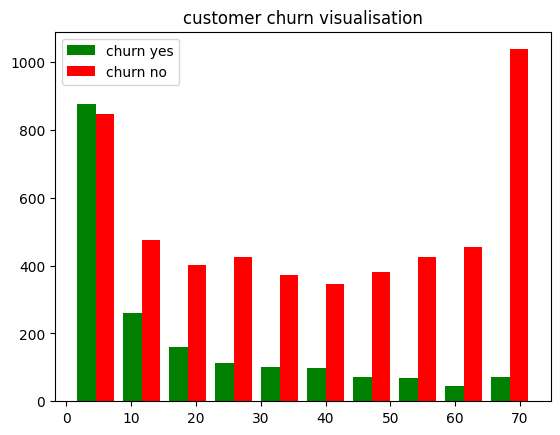

In [4]:
tenure_yes = data.loc[data.Churn == 'Yes', 'tenure']
tenure_no = data.loc[data.Churn == 'No', 'tenure']

plt.title('customer churn visualisation')
plt.hist([tenure_yes , tenure_no],color=['green' , 'red'] , label= ['churn yes' , 'churn no'])
plt.legend()
plt.show()

# we can conlude that that people work more than 70 months are not leaving 

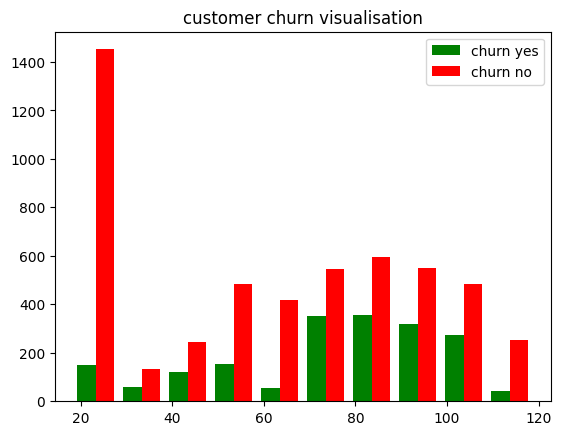

In [5]:
MCY = data.loc[data.Churn == 'Yes', 'MonthlyCharges']
MCN = data.loc[data.Churn == 'No', 'MonthlyCharges']

plt.title('customer churn visualisation')
plt.hist([MCY , MCN],color=['green' , 'red'] , label= ['churn yes' , 'churn no'])
plt.legend()
plt.show()

**Data Wrangling**

In [6]:
def unique_Column(data) :
    for i in data.columns : 
        if data[i].dtype == 'object': 
            print (f'{i} : {data[i].unique()}')


unique_Column(data)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [7]:
data.replace('No phone service','No', inplace= True)
data.replace('No internet service','No', inplace= True)
data.replace({ 'Yes' : 1, 'No' : 0}, inplace= True)
data.replace({ 'Male' : 1, 'Female' : 0}, inplace= True)
data.InternetService.replace(0,'No', inplace= True)

unique_Column(data)

InternetService : ['DSL' 'Fiber optic' 'No']
Contract : ['Month-to-month' 'One year' 'Two year']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [8]:
data2 = pd.get_dummies(data , columns= ['Contract' , 'InternetService' , 'PaymentMethod'])
data2.replace({ True: 1, False : 0}, inplace= True)
# now all columns are integer values 

In [9]:
# Scaling the columns 
scaler = MinMaxScaler()
column_scale = ['tenure' , 'MonthlyCharges' ,'TotalCharges']

data2[column_scale] = scaler.fit_transform(data2[column_scale])
data2.head(4)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,Contract_Month-to-month,Contract_One year,Contract_Two year,InternetService_DSL,InternetService_Fiber optic,InternetService_No,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,0.000000,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,0.464789,1,0,1,0,1,...,0,1,0,1,0,0,0,0,0,1
2,1,0,0,0,0.014085,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,0.619718,0,0,1,0,1,...,0,1,0,1,0,0,1,0,0,0


**Creating traing data and Testing data**

In [10]:
x = data2.drop(columns='Churn')
y = data2['Churn']

x_train , x_test , y_train , y_test = train_test_split(x,y ,train_size= .2 , random_state= 5)
x_train.shape , x_test.shape

((1406, 26), (5626, 26))

**Model Building**

In [11]:
model = keras.Sequential([
    keras.layers.Dense(30, input_shape = (26 ,) , activation ='relu'),
    keras.layers.Dense(20 , activation ='relu'),
    keras.layers.Dense(13 , activation ='relu'),
    keras.layers.Dense(1 , activation ='sigmoid')]
)

model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy' ,
    metrics = ['accuracy']
)

model.fit(
    x_train ,y_train ,epochs =50 , validation_split = .2 , verbose = 1
)

c:\Users\13zer\anaconda3\envs\dl\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.5189 - loss: 0.6803 - val_accuracy: 0.7163 - val_loss: 0.5895
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7538 - loss: 0.5579 - val_accuracy: 0.7163 - val_loss: 0.5414
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7647 - loss: 0.4891 - val_accuracy: 0.7163 - val_loss: 0.4937
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7654 - loss: 0.4529 - val_accuracy: 0.7447 - val_loss: 0.4643
Epoch 5/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7842 - loss: 0.4223 - val_accuracy: 0.7660 - val_loss: 0.4514
Epoch 6/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7973 - loss: 0.4221 - val_accuracy: 0.7837 - val_loss: 0.4447
Epoch 7/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7821 - loss: 0.4181 - val_accuracy: 0.7801 - val_loss: 0.4417
Epoch 8/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7875 - loss: 0.4213 - val_accuracy: 0.7979 - val_los

In [12]:
model.evaluate(x_test , y_test , verbose = 1)

176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7599 - loss: 0.5510


[0.5297772288322449, 0.7692854404449463]

In [13]:
y_pred = model.predict(x_test)
y_pred[:5]

176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


array([[1.4732289e-01],
       [6.7547011e-01],
       [5.5030856e-04],
       [7.7076036e-01],
       [2.9020482e-01]], dtype=float32)

In [14]:
prediction = []

for i in y_pred: 
    if i > .5 : 
        prediction.append(1)
    else : 
        prediction.append(0)  

prediction[:5]


[0, 1, 0, 1, 0]

In [15]:
print(f'classification report : {classification_report(y_test , prediction)}')

classification report :               precision    recall  f1-score   support

           0       0.82      0.87      0.85      4117
           1       0.58      0.50      0.54      1509

    accuracy                           0.77      5626
   macro avg       0.70      0.68      0.69      5626
weighted avg       0.76      0.77      0.76      5626



In [16]:
print(f'confusion matrix : {confusion_matrix(y_test , prediction)}')

confusion matrix : [[3581  536]
 [ 762  747]]


In [17]:
confusion_matrix(y_test , prediction)[0].sum()/confusion_matrix(y_test , prediction).reshape(1,4).sum()

np.float64(0.7317810167081408)

### **HOW TO DEAL WITH IMBALANCED DATA**

In [47]:
def ANN(X_train, y_train, X_test, y_test, loss, weights):
    model = keras.Sequential([
        keras.layers.Dense(26, input_dim=26, activation='relu'),
        keras.layers.Dense(15, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])
    
    if weights == -1:
        model.fit(X_train, y_train, epochs=100)
    else:
        model.fit(X_train, y_train, epochs=100, class_weight = weights)
    
    print(model.evaluate(X_test, y_test))
    
    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)
    
    print("Classification Report: \n", classification_report(y_test, y_preds))
    
    return y_preds


**1 . Under sampling** - not the best aproach

In [50]:
df_class_0 = data2[data2.Churn == 0]
df_class_1 = data2[data2.Churn == 1]

new_data = pd.concat([df_class_0.sample(1869) , df_class_1.sample(1869)] , axis = 0)
new_data.Churn.value_counts()



Churn
0    1869
1    1869
Name: count, dtype: int64

In [51]:
x = new_data.drop(columns='Churn')
y = new_data['Churn']
x_train , x_test , y_train , y_test = train_test_split(x,y ,train_size= .2 , random_state= 15, stratify=y)

y_pred = ANN(x_train, y_train, x_test, y_test, 'binary_crossentropy', -1)


Epoch 1/100


c:\Users\13zer\anaconda3\envs\dl\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5930 - loss: 0.6573
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7230 - loss: 0.6069
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7663 - loss: 0.5539
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7665 - loss: 0.5241
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7523 - loss: 0.5249
Epoch 6/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7830 - loss: 0.4868
Epoch 7/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7776 - loss: 0.5049
Epoch 8/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7835 - loss: 0.4648
Epoch 9/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7814 - loss: 0.5015
Epoch 10/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7921 - loss: 0.4646
Epoch 11/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7587 - loss: 0.4938
Epoch 12/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8191 - l

**2. Oversampling minority class by duplicating**

In [52]:
df_class_1_new = df_class_1.sample(df_class_0.shape[0] , replace = True)
data_new1 = pd.concat([df_class_0 , df_class_1_new] , axis = 0)

In [53]:
x = data_new1.drop(columns='Churn')
y = data_new1['Churn']
x_train , x_test , y_train , y_test = train_test_split(x,y ,train_size= .2 , random_state= 15, stratify=y)

In [54]:
y_pred = ANN(x_train, y_train, x_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100


c:\Users\13zer\anaconda3\envs\dl\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


65/65 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5850 - loss: 0.6604
Epoch 2/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7310 - loss: 0.5511
Epoch 3/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7463 - loss: 0.5008
Epoch 4/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7603 - loss: 0.4922
Epoch 5/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7723 - loss: 0.4819
Epoch 6/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7762 - loss: 0.4690
Epoch 7/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7669 - loss: 0.4764
Epoch 8/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7876 - loss: 0.4510
Epoch 9/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7628 - loss: 0.4738
Epoch 10/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7880 - loss: 0.4538
Epoch 11/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7835 - loss: 0.4543
Epoch 12/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7944 - lo

**3. Oversampling minority class uning SMOTE**

In [75]:
x = data2.drop(columns='Churn')
y = data2['Churn']

y.value_counts()


Churn
0    5163
1    1869
Name: count, dtype: int64

In [83]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority' , random_state=42)
x_sm, y_sm = smote.fit_resample(x, y)

x_train , x_test , y_train , y_test = train_test_split(x_sm, y_sm, train_size= 0.2, random_state= 15, stratify=y_sm) # Stratify with y_sm

y_pred = ANN(x_train, y_train, x_test, y_test, 'binary_crossentropy', -1)

c:\Users\13zer\anaconda3\envs\dl\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6143 - loss: 0.6578
Epoch 2/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7978 - loss: 0.5103
Epoch 3/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7908 - loss: 0.4664
Epoch 4/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8042 - loss: 0.4389
Epoch 5/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7873 - loss: 0.4566
Epoch 6/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8002 - loss: 0.4231
Epoch 7/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7895 - loss: 0.4475
Epoch 8/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7931 - loss: 0.4286
Epoch 9/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7809 - loss: 0.4464
Epoch 10/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8010 - loss: 0.4182
Epoch 11/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8040 - loss: 0.4286
Epoch 12/100
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy

**4 .Ensamble** - Divide the majority class and train part of majority class and minority class and then combine the result.

**5. Focal Loss** - penalize the majority class during loss calculation and give more weight to the minority class.